# Lab 2
Prepared:
 - **Szymon Budziak**
 - **Krzysztof Gwiazda**

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Data preprocessing

### 1. Choose images from Plantdoc set

We have selected 3 tomato diseases:
- Tomato leaf bacterial spot
- Tomato leaf late blight
- Tomato leaf mosaic virus

### 2. Load images

In [2]:
full_path = f"{os.path.abspath('')}/Data"

In [3]:
files = [f"{full_path}/{filename}" for filename in os.listdir(full_path)]
len(files)

246

In [4]:
images = [np.array(Image.open(file)) for file in files]
images[0].shape

(600, 800, 3)

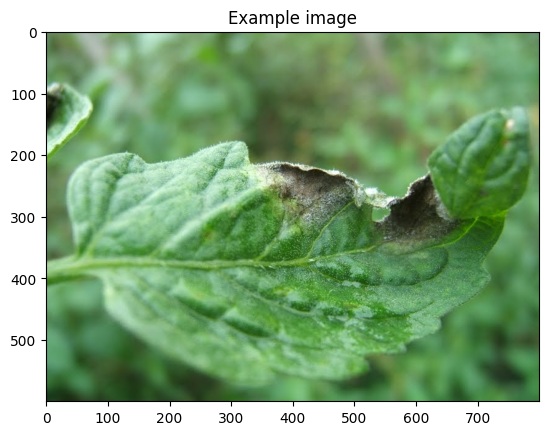

In [5]:
plt.title("Example image")
plt.imshow(images[0])

### 3. Scale images to 224x224x3 resolution

In [6]:
scaled_images = [np.resize(img, (224, 224, 3)) for img in images]
scaled_images[0].shape

(224, 224, 3)

### 4. Convert images to greyscale

In [7]:
greyscale_images = [np.array(Image.fromarray(img).convert('L')) for img in scaled_images]
greyscale_images[0].shape

(224, 224)

### 5. Convert images to 1D vector

In [8]:
vector_images = [img.ravel() for img in greyscale_images]
vector_images[0].shape

(50176,)

### 6. Standardize images

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
standardized_images = scaler.fit_transform(vector_images)
standardized_images.shape

(246, 50176)

# Principal component analysis (PCA)

In [12]:
from sklearn.decomposition import PCA

### 1. Perform PCA

In [13]:
pca = PCA()

In [14]:
pca_standardized_images = pca.fit_transform(standardized_images)
pca.explained_variance_ratio_.shape

(246,)

### 2. Covariance matrices before PCA and after

In [15]:
cov_matrix_before = np.cov(standardized_images)
cov_matrix_before.shape

(246, 246)

In [16]:
cov_matrix_before

array([[ 1.00759444e-01,  1.45650773e-03,  9.50823437e-03, ...,
        -3.26438226e-03,  1.83824110e-03,  4.08246684e-04],
       [ 1.45650773e-03,  1.31070825e-01, -1.12250328e-02, ...,
        -2.05368345e-02,  3.98210052e-03,  8.40826186e-04],
       [ 9.50823437e-03, -1.12250328e-02,  4.95551527e-01, ...,
        -1.06015014e-02, -5.45390642e-03, -6.59626790e-03],
       ...,
       [-3.26438226e-03, -2.05368345e-02, -1.06015014e-02, ...,
         1.24156874e+00, -3.40571343e-03, -1.89114105e-02],
       [ 1.83824110e-03,  3.98210052e-03, -5.45390642e-03, ...,
        -3.40571343e-03,  2.15461560e-01,  7.98113098e-03],
       [ 4.08246684e-04,  8.40826186e-04, -6.59626790e-03, ...,
        -1.89114105e-02,  7.98113098e-03,  2.98145710e-01]])

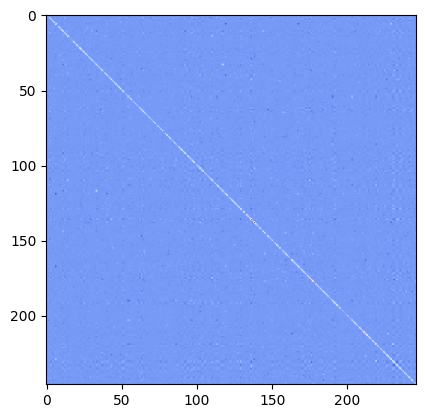

In [17]:
plt.imshow(cov_matrix_before, cmap="coolwarm")

In [18]:
cov_matrix_after = np.cov(pca_standardized_images)
cov_matrix_after.shape

(246, 246)

In [19]:
cov_matrix_after

array([[  51.83776294,  -25.06374636,   32.5202714 , ...,   -3.47818911,
          55.1564098 ,  -68.88188207],
       [ -25.06374636,   47.43297548,  -27.08627061, ...,   -1.93226078,
         -43.77931952,   56.17494701],
       [  32.5202714 ,  -27.08627061,  131.28175363, ...,   -4.89808782,
          52.73415299,  -68.78728766],
       ...,
       [  -3.47818911,   -1.93226078,   -4.89808782, ...,  254.51701009,
          -5.65863812,    2.31487238],
       [  55.1564098 ,  -43.77931952,   52.73415299, ...,   -5.65863812,
         140.10518666, -119.59307576],
       [ -68.88188207,   56.17494701,  -68.78728766, ...,    2.31487238,
        -119.59307576,  213.37248222]])

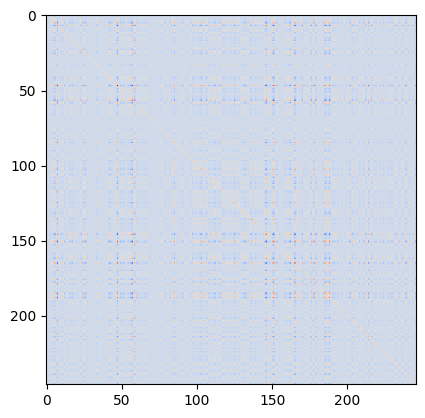

In [20]:
plt.imshow(cov_matrix_after, cmap="coolwarm")

### 3. Average photo we subtracted from the others to standardize images

In [21]:
image_mean = np.reshape(scaler.mean_, (224, 224))

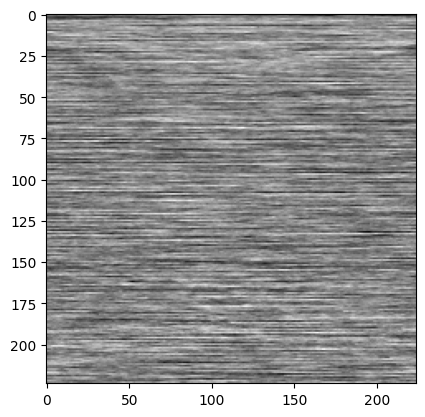

In [22]:
plt.imshow(image_mean, cmap='gray_r')

### 4. Present principal components sorted by related variance

In [23]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

In [24]:
sorted_eigenvalues = sorted(eigenvalues, reverse=True)
sorted_eigenvectors = eigenvectors[np.argsort(-eigenvalues)]
sorted_eigenvectors

array([[ 3.47794180e-03,  3.88635319e-03,  3.86171682e-03, ...,
         4.20168387e-03,  4.37727812e-03,  4.50279044e-03],
       [ 6.72292031e-03,  8.16614752e-03,  7.77773407e-03, ...,
        -4.79332042e-03, -4.53129892e-03, -4.64698946e-03],
       [-6.04285214e-03, -6.05166482e-03, -6.02544440e-03, ...,
        -3.47785938e-03, -3.37600249e-03, -3.53031962e-03],
       ...,
       [-4.89081669e-03, -4.84370206e-03,  1.05043602e-03, ...,
         6.55957905e-03, -2.34629868e-03,  1.29527972e-02],
       [-6.44640662e-01, -7.48096894e-02, -8.94919627e-02, ...,
         6.07985272e-04,  4.13072132e-04,  2.55683235e-03],
       [-1.01435187e-02,  1.20575772e-02, -5.81523853e-03, ...,
         1.23209463e-03, -9.86004011e-04, -6.13564757e-04]])

According to the [PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), principal components are sorted by decreasing explained_variance_ (so principal components are sorted by related varinace by default).

### 5. Reduce the dimensionality to the 3, 9 and 27 most important features, respectively

In [25]:
pca3 = PCA(n_components=3)
pca3_fit = pca3.fit_transform(standardized_images)

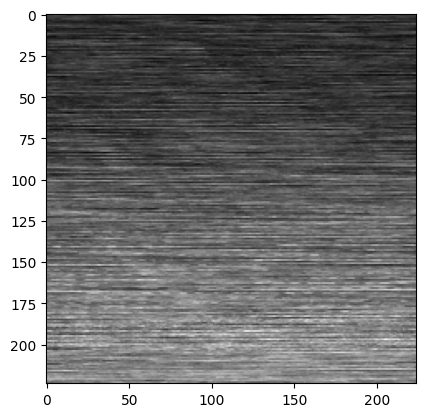

In [26]:
pca3_inversed = pca3.inverse_transform(pca3_fit)
img_pca3 = pca3_inversed[0].reshape(224, 224)
plt.imshow(img_pca3, cmap='gray_r')

In [27]:
pca9 = PCA(n_components=9)
pca9_fit = pca9.fit_transform(standardized_images)

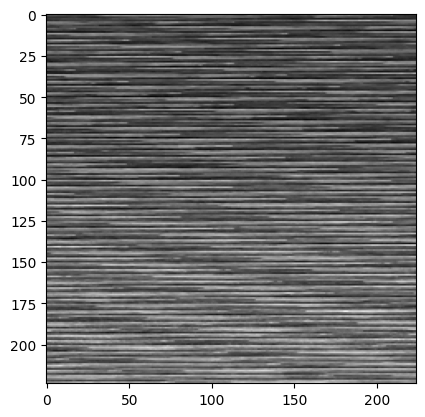

In [28]:
pca9_inversed = pca9.inverse_transform(pca9_fit)
img_pca9 = pca9_inversed[0].reshape(224, 224)
plt.imshow(img_pca9, cmap='gray_r')

In [29]:
pca27 = PCA(n_components=27)
pca27_fit = pca27.fit_transform(standardized_images)

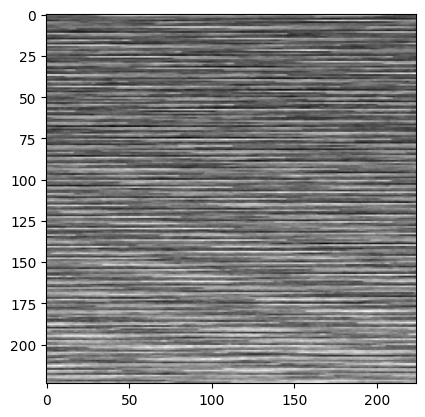

In [30]:
pca27_inversed = pca27.inverse_transform(pca27_fit)
img_pca27 = pca27_inversed[0].reshape(224, 224)
plt.imshow(img_pca27, cmap='gray_r')

### 6. Plot the explained variance

basic PCA

Text(0.5, 0, 'All principal components')

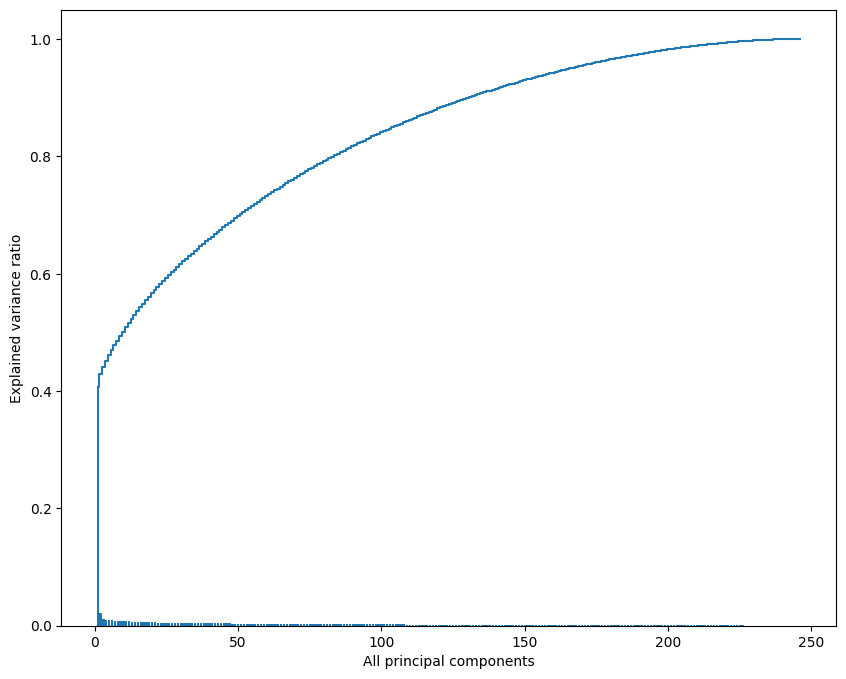

In [31]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, 247), pca.explained_variance_ratio_, align='center')
plt.step(range(1, 247), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('All principal components')

3 most important features

Text(0.5, 0, '3 principal components')

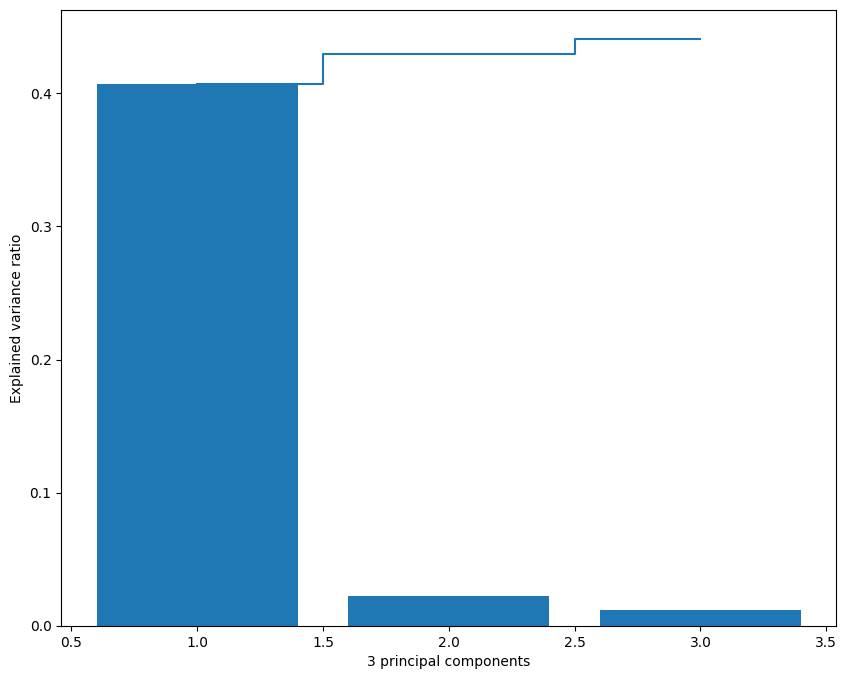

In [32]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, 4), pca3.explained_variance_ratio_, align='center')
plt.step(range(1, 4), np.cumsum(pca3.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('3 principal components')

9 most important features

Text(0.5, 0, '9 principal components')

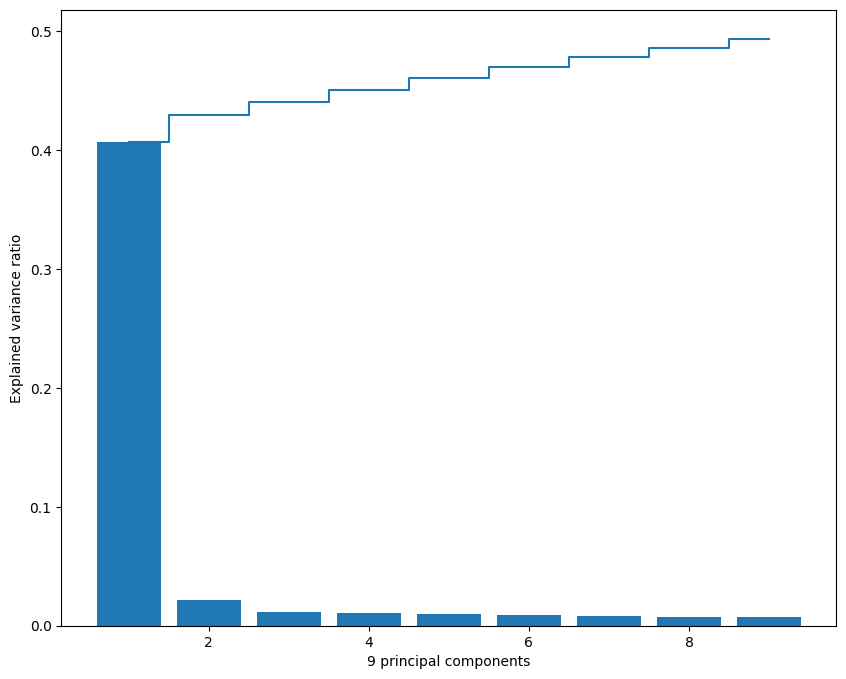

In [33]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, 10), pca9.explained_variance_ratio_, align='center')
plt.step(range(1, 10), np.cumsum(pca9.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('9 principal components')

27 most important features

Text(0.5, 0, '27 principal components')

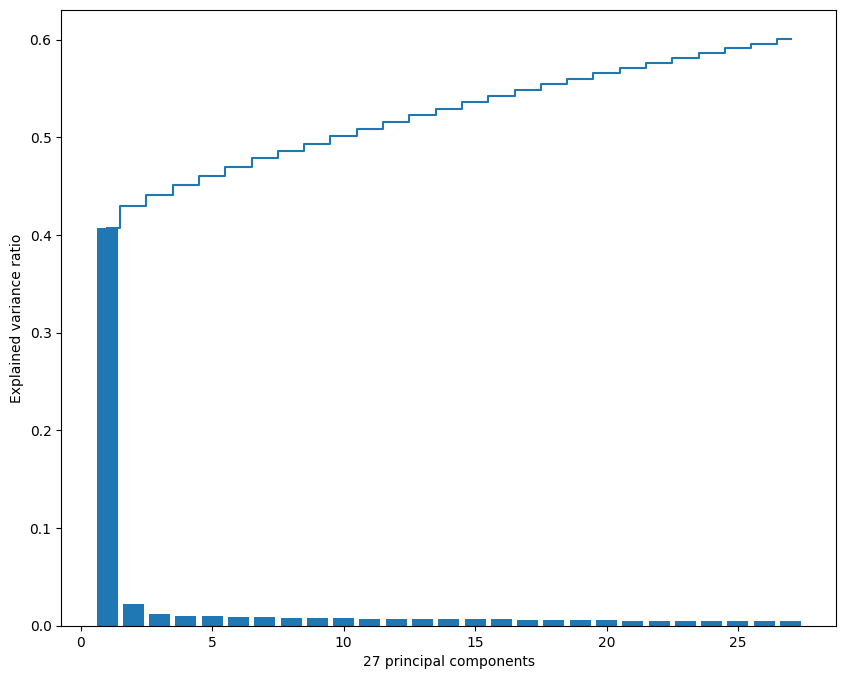

In [34]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, 28), pca27.explained_variance_ratio_, align='center')
plt.step(range(1, 28), np.cumsum(pca27.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('27 principal components')